<a href="https://colab.research.google.com/github/mschuessler/dba_lecture/blob/main/notebooks/DBA2_03_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
In this example we are trying to predict the number of sales made (denoted as y) from the amount spend on advertise ment on TV, radio and newspaer (denoted as X).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
advertisements = pd.read_csv('https://raw.githubusercontent.com/mschuessler/dba_lecture/refs/heads/main/data/advertising.csv', index_col=0)
advertisements

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# Simplified Bulk Plotting
Instead of building individual plots I am using a function that allows me to plot multiple variables against my traget veraible that we a trying to predict

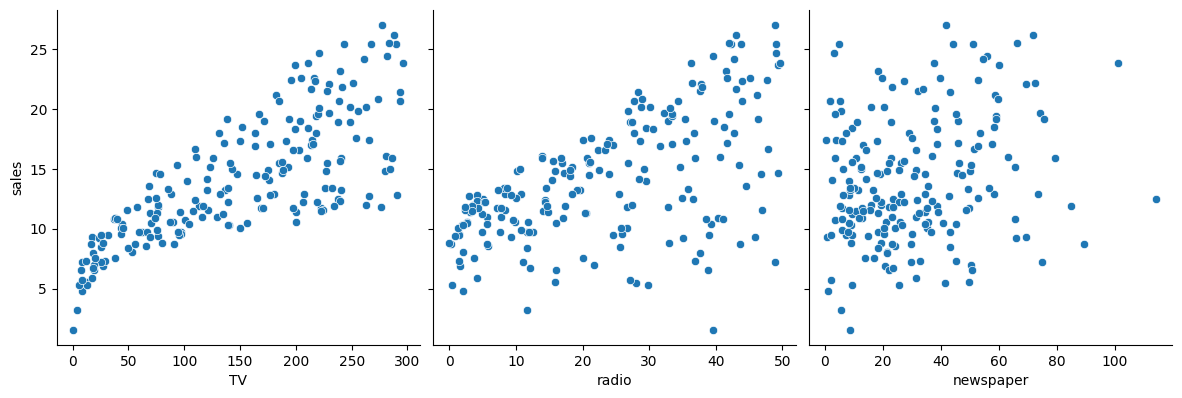

In [ ]:
sns.pairplot(advertisements,x_vars=['TV','radio','newspaper'], y_vars=['sales'], height=4, aspect=1)

## Column Split: Seperating predictors and target
As a common convention we storing what we are trying to predict in Y and what we are using for the prediction in X

In [ ]:
X = advertisements[['TV','radio','newspaper']]
y = advertisements['sales']

# Row Split: Splitting into Test and Training Set
We need one part of the data we are using for training the model and another to evaluate the performance. This is important to avoid overfitting. If we would use all the data for training, the model may just memorise the data instead of learning something that will work on unseen data. For this reason we take a part of the data that we do not show the model. Namely the correct answers for the test set (y_test).

We could make this split manually using pandas, but there is a function that does it for us in one line of code. Here we create:
- X_train: The predictor data we use for training (This is the input)
- y_train: The correct answers (sales) for the training (This the will be used during training to tell the model: "This was wrong - try again!")
- X_test: The predictor data we give to the model after training to see what it will predict (Here what sales it will predict)
- y_test: The correct answer (ground truth sales) of the test set. This we dont give the model but use it to compare against the predictions of the model to know how bad or good the model is

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initalising and training models - Building a Dummy Baseline model
The simplest machine learning model there is we already know. Its the average (mean, median). We can simply ignore all predictors that we have and simply always predict the mean value.

The mean of all sales in our training set is 14.1. This means for every row we would simply predict 14.1 sales.

In [ ]:
y_train.mean()

np.float64(14.1)

We can build exactly such a bad baseline model by using a DummyRegressor. We are doing that to get an inital idea of what "bad performance" means. I also use this example to show the typical steps involved in training a model with scikit-learn.

## Step 1: Initalise an empty model
The model is an empty object that has a matematical logic build in that describes how it will try to understand and describe the data. Here the model is very stupid. It will just take the mean and use only that for prediction.

In [ ]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')

## Step 2: Train the model
The nice thing about scikit learn is that we only need to call the fit function and pass it our training data. This is the same procedure no matter what type of model we are using.

In [ ]:
dummy.fit(X_train, y_train)

DummyRegressor()

## Step 3: Make predictions
Similarly easy is prediction. The model is now trained after we called the fit function. Now we can call the predict function. Note that we are only passing the predictors of our test set, we do not give this function the correct answer stored in y_test. We keep that data seperate because we need it to evaulate the models performance.

In [ ]:
y_pred = dummy.predict(X_test)


If we look at the prediction of the model, we see it simply alway predicts the mean

In [ ]:
y_pred

array([14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1,
       14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1,
       14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1,
       14.1, 14.1, 14.1, 14.1, 14.1, 14.1, 14.1])

If we visualise this we can see how simple our model predicts sales and that this model is not very accurate.

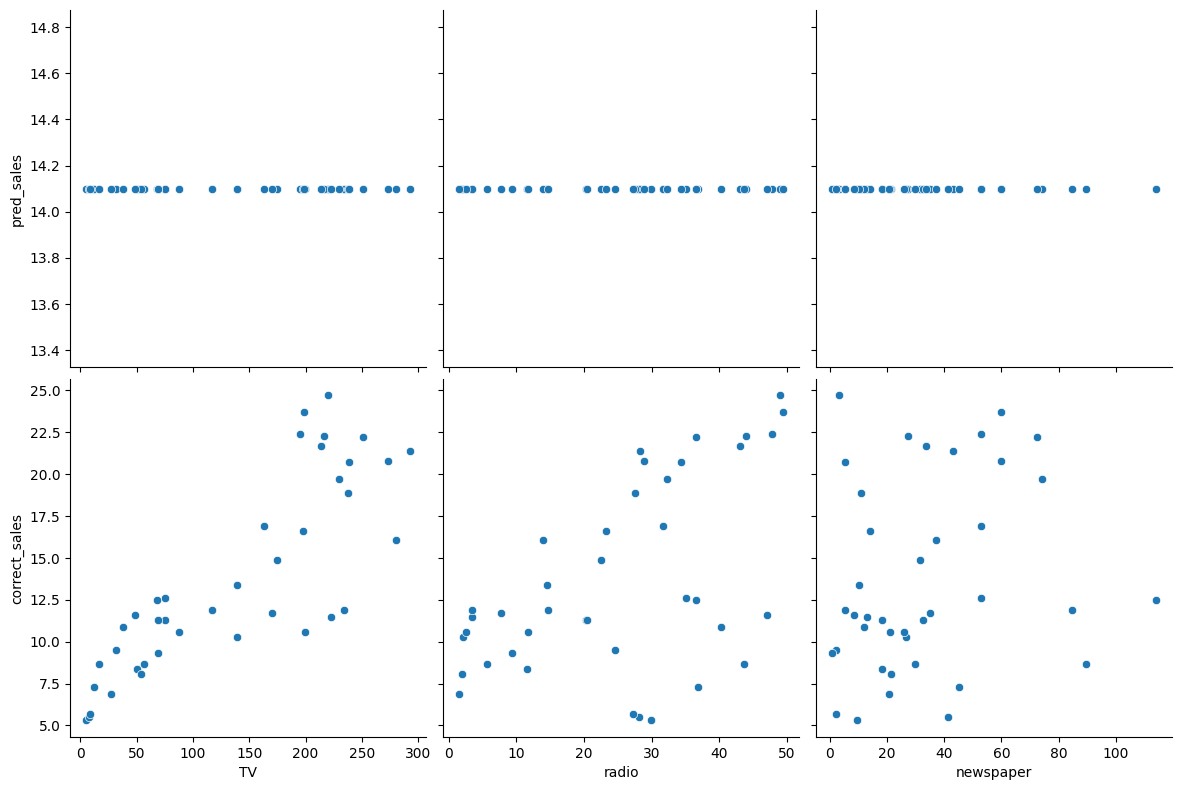

In [ ]:
res = X_test.copy()
res['pred_sales'] = y_pred
res['correct_sales'] = y_test
#plot
sns.pairplot(res,x_vars=['TV','radio','newspaper'], y_vars=['pred_sales','correct_sales'], height=4, aspect=1)

## Step 4: Calculating performance measure
Now that we have the prediction of the model we need to check wheter they are correct. If a model is just predicting ordinal data like "yes" and "no" or "Category 1", "Category 2", "Category 3" this is rather easy, because we can just count: How many did it get right and how many wrong. But here we are predicting on the interval scale. Its unlikely the model will have predicted the sales accurately to the last diget. So instead we need a distance measure that answers the question: "How far of were the models predictions from the correct answer?" The standard way to do this is the the means squared error (MSE). The MSE calculation is simple:
1) Calculate the difference between the prediction and the true answer
2) Square that difference: This means that small mistakes do not really contirbute much, while big mistakes matter a lot
3) Sum up the squared difference for all predictions and take the mean.

In [ ]:
difference = y_pred - y_test
squared_difference = difference**2
mse = squared_difference.mean()
mse

np.float64(31.713749999999997)

Now 25.57 is our new baseline error. We know that the performance of our stupid model. So we would expect other model to get an MSE lower than that.

Of course, once again we do not need to calculate mse in several steps. There is a function we can use to turn this into one line of code

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

31.713749999999997

## Training another model: Linear Regression
A linear regression model will try to construct a simple formular:

`sales = x1*TV + x2*radio + x3*newspaper + b`

Essentiall the model tries to find the best values for x1,x2,x3,b


The procedure to train it is just the same as with the DummyPredictor. We just use a LinearRegression model instead.

In [ ]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

3.1740973539761033

We can see that the MSE is 3.17 an therefore much lower that 25.57.
So this model performed way better than our DummyModel.

### Understanding what this model did
And since a LinearRegression model is so simple we can even extract the parameters it has learned:

In [ ]:
b = linreg_model.intercept_
x1 = linreg_model.coef_[0]
x2 = linreg_model.coef_[1]
x3 = linreg_model.coef_[2]
print(f'sales = {x1}*TV + {x2}*radio + {x3}*newspaper + {b}')

sales = 0.044729517468716326*TV + 0.18919505423437652*radio + 0.0027611143413671935*newspaper + 2.979067338122629


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


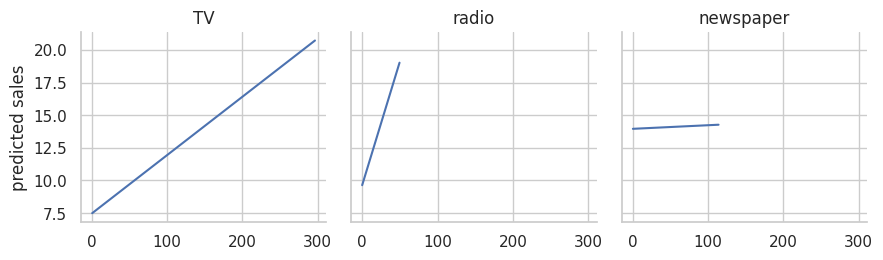

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_names = ["TV", "radio", "newspaper"]

x_means = X.mean(axis=0)

rows = []
for i, name in enumerate(feature_names):
    xgrid = np.linspace(X[name].min(), X[name].max(), 200)

    X_tmp = np.tile(x_means, (len(xgrid), 1))
    X_tmp[:, i] = xgrid

    yhat = linreg_model.predict(X_tmp)

    rows.append(pd.DataFrame({"feature": name, "x": xgrid, "yhat": yhat}))

plot_df = pd.concat(rows, ignore_index=True)

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(plot_df, col="feature", col_wrap=3, sharey=True, height=3)
g.map_dataframe(sns.lineplot, x="x", y="yhat")
g.set_axis_labels("", "predicted sales")
g.set_titles("{col_name}")
plt.show()

Lets quickly check if this is really how our model makes its prediction by calculating predictions the same way

In [ ]:
manual_pred = X_test.copy()
manual_pred['calc_sales'] = x1*X_test['TV'] + x2*X_test['radio'] + x3*X_test['newspaper'] + b
manual_pred['pred_sales'] = y_pred
manual_pred['correct_sales'] = y_test
manual_pred['error'] = manual_pred['correct_sales'] - manual_pred['calc_sales']
manual_pred['squared_error'] = manual_pred['error']**2

manual_pred

,TV,radio,newspaper,calc_sales,pred_sales,correct_sales,error,squared_error
96,163.3,31.6,52.9,16.408024,16.408024,16.9,0.491976,0.242040
16,195.4,47.7,52.9,20.889882,20.889882,22.4,1.510118,2.280456
31,292.9,28.3,43.2,21.553843,21.553843,21.4,-0.153843,0.023668
159,11.7,36.9,45.2,10.608503,10.608503,7.3,-3.308503,10.946189
129,220.3,49.0,3.2,22.112373,22.112373,24.7,2.587627,6.695812
116,75.1,35.0,52.7,13.105592,13.105592,12.6,-0.505592,0.255623
70,216.8,43.9,27.2,21.057192,21.057192,22.3,1.242808,1.544572
171,50.0,11.6,18.4,7.461010,7.461010,8.4,0.938990,0.881702
175,222.4,3.4,13.1,13.606346,13.606346,11.5,-2.106346,4.436693
46,175.1,22.5,31.5,15.155070,15.155070,14.9,-0.255070,0.065061


And we can also verifiy that the MSE is calulated correctly.

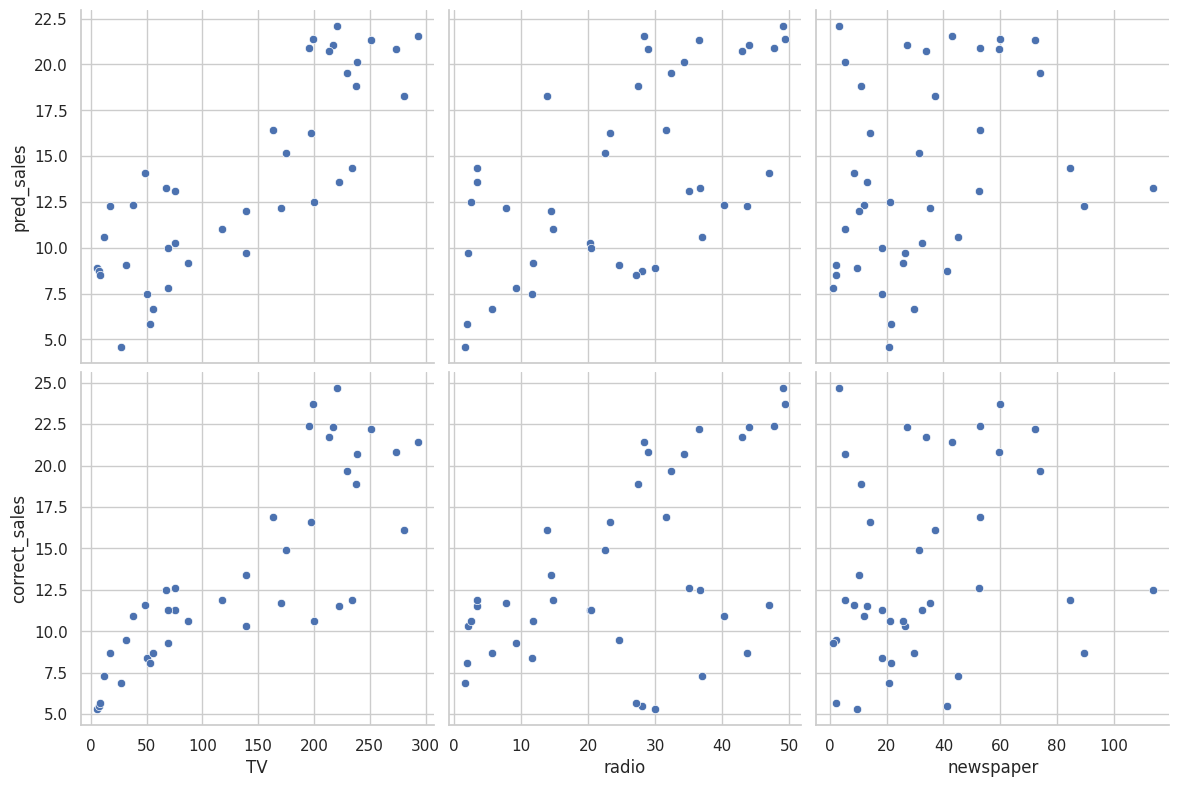

In [ ]:
sns.pairplot(manual_pred,x_vars=['TV','radio','newspaper'], y_vars=['pred_sales','correct_sales'], height=4, aspect=1)

## Traing a Polynomial
Take a look at the graph we plotted earlier. You can easily see that fitting a straight line to each of these features may not be the best approch. We can try to fit a line that bends. This is called a polynomial. Polinomial of higher degress get even more complex, so lets start with one of degree 2. Essentiall what we need to do here is to transform our feature into polynomial feature and the use a linear model on top of that. I highly recommend to aks chat gpt for help. Pick a model that you want to try, then aks Chat-GPT for help. Here we immedeatly get very good performance.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Transform the features into polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict using the polynomial regression model
y_pred = poly_model.predict(X_test_poly)

# Calculate the mean squared error
mean_squared_error(y_test, y_pred)

0.41291022853790765

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


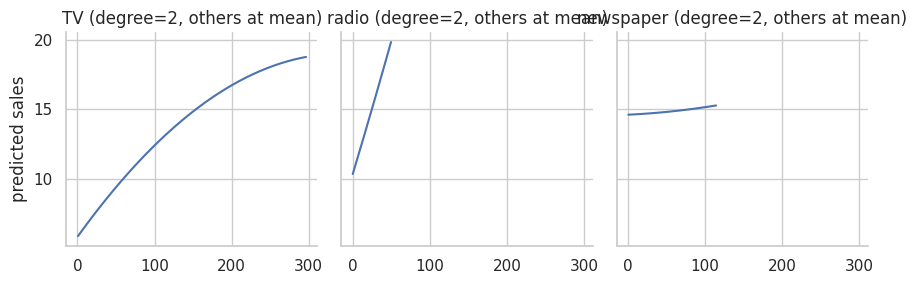

In [ ]:

# X is your df with only the feature columns
feature_names = list(X.columns)

# reference point for "hold others fixed"
x_ref = X.mean(axis=0).to_numpy()

rows = []
for i, name in enumerate(feature_names):
    xgrid = np.linspace(X[name].min(), X[name].max(), 300)

    X_tmp = np.tile(x_ref, (len(xgrid), 1))
    X_tmp[:, i] = xgrid

    # transform with the SAME PolynomialFeatures object you fit
    X_tmp_poly = poly.transform(X_tmp)

    # predict with the fitted polynomial linear model
    yhat = poly_model.predict(X_tmp_poly)

    rows.append(pd.DataFrame({"feature": name, "x": xgrid, "yhat": yhat}))

plot_df = pd.concat(rows, ignore_index=True)

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(plot_df, col="feature", col_wrap=3, sharey=True, height=3)
g.map_dataframe(sns.lineplot, x="x", y="yhat")
g.set_axis_labels("", "predicted sales")
g.set_titles("{col_name} (degree=2, others at mean)")
plt.tight_layout()
plt.show()

## Check for overfitting
We can also calculate the models performance on the traing set. Remember that good performance on the training set but poor performance on the test set is a serious indication of overfitting. Here performance on the training set is better than on test. We might be overfitting already.

In [ ]:
y_pred_train = poly_model.predict(X_train_poly)
mean_squared_error(y_train, y_pred_train)

0.36039667447012225

Lets see if making the model even more complex changes performance. Here I build a small loop that just builds three different models:
- 2nd degree Polynomial
- 3rd degree Polynomial
- 4th degree Polynomial

 You can see that we definelty start overfitting as performance on the traing set is great (very small error). But the performance on the test set goes south.

In [ ]:
for d in range(2,5):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)

    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Fit the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Predict using the polynomial regression model
    y_pred = poly_model.predict(X_test_poly)

    # Calculate the mean squared error
    print("Degree {} - MSE on test set:{}".format(d, mean_squared_error(y_test, y_pred)))
    print("Degree {} - MSE on training set:{}".format(d, mean_squared_error(y_train, poly_model.predict(X_train_poly))))

Degree 2 - MSE on test set:0.41291022853790765
Degree 2 - MSE on training set:0.36039667447012225
Degree 3 - MSE on test set:0.29456840908048887
Degree 3 - MSE on training set:0.21606116397546854
Degree 4 - MSE on test set:0.6179511359659585
Degree 4 - MSE on training set:0.13572790507746096


# Changing what we are predicting
Sometimes we are not interessted to predict the exact number, but i may be suffcient to predict a category, which allows us to make the problem the model need the solve a little simpler. Here we use a function called qcut which we can use to create a column that simply denotes which quantile the sales belong to. The labels are optional but usefull to describe what we are doing.

In [ ]:
advertisements['sales_level'] = pd.qcut(advertisements['sales'], # Create categories of sales
                            q=4, # Create 4 categories/percentiles
                            labels=('low', 'slighty below average', 'slighty above average', 'high') # Name the categories
                            )

In [ ]:
advertisements

,TV,radio,newspaper,sales,sales_level
1,230.1,37.8,69.2,22.1,high
2,44.5,39.3,45.1,10.4,slighty below average
3,17.2,45.9,69.3,9.3,low
4,151.5,41.3,58.5,18.5,high
5,180.8,10.8,58.4,12.9,slighty below average
...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,low
197,94.2,4.9,8.1,9.7,low
198,177.0,9.3,6.4,12.8,slighty below average
199,283.6,42.0,66.2,25.5,high


We can quickly check if each sales_level has the same amount of observations.

In [ ]:
advertisements.sales_level.value_counts()

,count
sales_level,
slighty below average,52
low,50
slighty above average,49
high,49


We need to split our data again because our X changed from sales to sales_level

In [ ]:
X_train, X_test, y_train_categorical, y_test_categorical = train_test_split(X, advertisements['sales_level'], test_size=0.2, random_state=42)

## Training a Logistic Regression Model
Now we can use a logistic regression model to predict the sales category. However we can not use MSE as our performance measure anymore as calculating differences between categories does not work. Here we have to use a much simple measure: Accuracy which simply is:

`accuracy = Number of correct prediction / Numbr of predictions`

We see that we get an accuracy of 85% which is not bad but also not perfect.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train_categorical)
y_pred = logreg_model.predict(X_test)
y_pred




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['slighty above average', 'high', 'high', 'low', 'high',
       'slighty above average', 'high', 'low', 'slighty below average',
       'slighty above average', 'low', 'low', 'slighty below average',
       'low', 'slighty below average', 'slighty below average', 'low',
       'slighty above average', 'slighty below average', 'high', 'high',
       'slighty below average', 'slighty above average', 'high', 'low',
       'low', 'high', 'slighty below average', 'low', 'low',
       'slighty below average', 'low', 'high', 'low',
       'slighty above average', 'high', 'slighty above average', 'high',
       'slighty below average', 'low'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_categorical, y_pred)
accuracy

0.825

# Just for reference: Training XGBoost
XGBoost shows great performance in many practical use cases. I include this section here only for reference without much explanation. Essentiall I am creating the categories again, but his time with numbers, because XGBoost does not like labels. We can see that it performs well here with 95% accuracy.

In [ ]:
X_train, X_test, y_train_categorical, y_test_categorical = train_test_split(
    X,
    pd.qcut(advertisements['sales'], q=4, labels=False),
    test_size=0.2,
    random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Use appropriate eval_metric for classification

# Train the model
xgb_model.fit(X_train, y_train_categorical)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_score(y_test_categorical, y_pred)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:02:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.95

However: Here we have the perfect example that XGBoost simply memorised the training data. It gets perfect accuaracy which is concerning.

In [ ]:
accuracy_score(y_train_categorical, xgb_model.predict(X_train))

1.0

## Training neural network
Training neural networks is beyond the scope o this class. The following example simply illustrates that this is possible with scikit-learn too. For more advanced models I would recommend Tensorflow or PyTorch.

In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize the neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Predict using the neural network model
y_pred = nn_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

25.575735092991536